**Assignment No 4:**

Use Autoencoder to implement anomaly detection. Build the model by using:
a. Import required libraries
b. Upload / access the dataset
c. Encoder converts it into latent representation
d. Decoder networks convert it back to the original input
e. Compile the models with Optimizer, Loss, and Evaluation Metrics

In [1]:
# a. Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import tensorflow as tf
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
mpl.rcParams['figure.figsize'] = (10, 5) # Sets the default figure size for Matplotlib to (10, 5).
mpl.rcParams['axes.grid'] = False # Disables grid lines in Matplotlib plots.

In [2]:
# b. Upload/access the dataset
!cat "/content/ECG5000_TRAIN.txt" "/content/ECG5000_TEST.txt" > ecg_final.txt # This line concatenates two text files, "ECG5000_TRAIN.txt" and "ECG5000_TEST.txt," into a single file named "ecg_final.txt."
df = pd.read_csv("/content/ecg_final.txt", sep='  ', header=None, engine='python') # Reads the concatenated data from "ecg_final.txt" into a Pandas DataFrame. It uses a space separator (' ') and specifies no header row. The 'engine' parameter is set to 'python' to avoid a warning about the parser engine.
df.shape # Retrieves the shape of the DataFrame, indicating the number of rows and columns in the data.

(5000, 141)

In [3]:
df = df.add_prefix('c') # Prefixes all column names in the DataFrame with 'c' to ensure valid column names.
df['c0'].value_counts() # Counts and displays the unique values in the 'c0' column. This likely provides insights into the distribution of values in that column.

1.0    2919
2.0    1767
4.0     194
3.0      96
5.0      24
Name: c0, dtype: int64

In [4]:
x_train, x_test, y_train, y_test = train_test_split(df.values, df.values[:,0:1], test_size=0.2, random_state=111) # Splits the data into training and testing sets using scikit-learn's train_test_split function. The test_size parameter specifies the proportion of data to be used for testing (20%), and random_state sets the random seed for reproducibility.

In [5]:
scaler = MinMaxScaler() # Initializes a Min-Max scaler.
data_scaled = scaler.fit(x_train) # Fits the scaler to the training data.
train_data_scaled = data_scaled.transform(x_train) # Transforms the training data using the fitted scaler.
test_data_scaled = data_scaled.transform(x_test) # Transforms the test data using the same scaler. Min-Max scaling scales data to the range [0, 1].

In [6]:
normal_train_data = pd.DataFrame(train_data_scaled).add_prefix('c').query('c0 == 0').values[:,1:]
anomaly_train_data = pd.DataFrame(train_data_scaled).add_prefix('c').query('c0 > 0').values[:, 1:]
normal_test_data = pd.DataFrame(test_data_scaled).add_prefix('c').query('c0 == 0').values[:,1:]
anomaly_test_data = pd.DataFrame(test_data_scaled).add_prefix('c').query('c0 > 0').values[:, 1:]

# normal_train_data and anomaly_train_data are created by querying the DataFrame to separate normal and anomaly data from the training set.
# normal_test_data and anomaly_test_data are created in a similar manner but for the testing set.

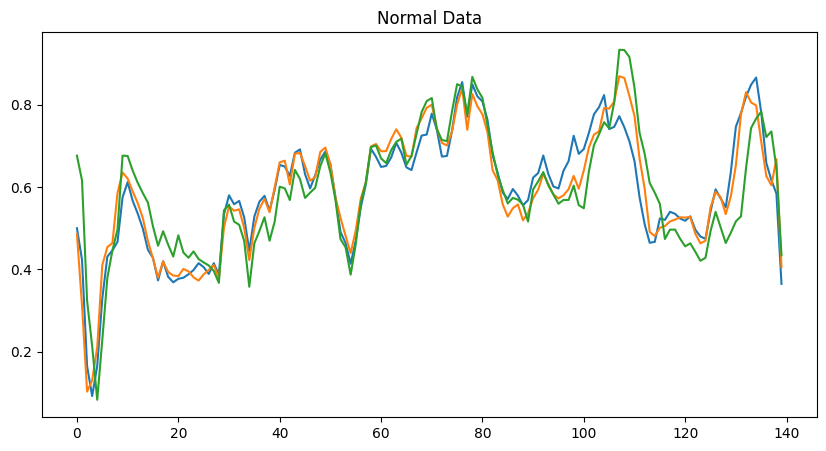

In [7]:
plt.plot(normal_train_data[0])
plt.plot(normal_train_data[1])
plt.plot(normal_train_data[2])
plt.title("Normal Data")
plt.show()

# This code plots the first three features of the normal training data. It shows a line plot for each feature with the title "Normal Data."/

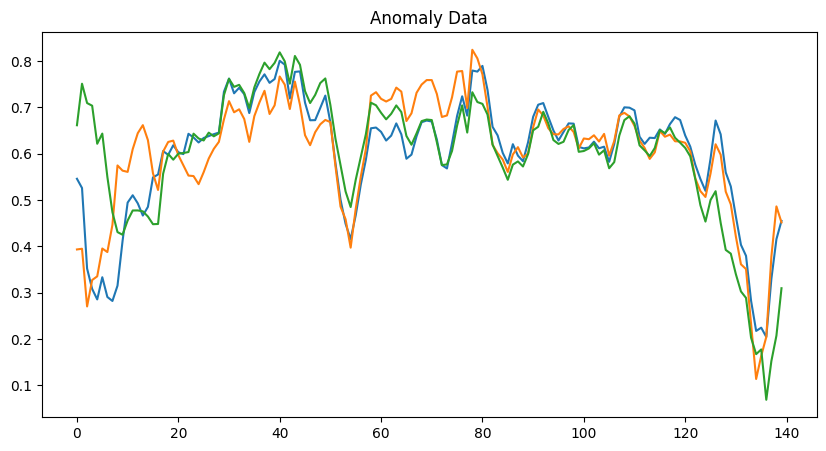

In [8]:
plt.plot(anomaly_train_data[0])
plt.plot(anomaly_train_data[1])
plt.plot(anomaly_train_data[2])
plt.title("Anomaly Data")
plt.show()

# Similar to the previous section, this code plots the first three features of the anomaly training data. It shows a line plot for each feature with the title "Anomaly Data."

In [9]:
# # A sequential neural network model is created using TensorFlow/Keras. The model consists of several dense (fully connected) layers with ReLU activation functions. The final layer uses a sigmoid activation function.
# model = tf.keras.Sequential() # This line initializes a Sequential model, which is a linear stack of layers in Keras. It's a common choice for feedforward neural networks.
# model.add(tf.keras.layers.Dense(64, activation="relu")) # This line adds the first dense (fully connected) layer to the model with 64 units (neurons) and a ReLU (Rectified Linear Unit) activation function. The ReLU activation function is a common choice for hidden layers in deep neural networks.
# model.add(tf.keras.layers.Dense(32, activation="relu")) # This adds another dense layer with 32 units and ReLU activation. It reduces the number of units compared to the previous layer, which is a common practice in neural network architectures.
# model.add(tf.keras.layers.Dense(16, activation="relu")) # This line adds another dense layer with 16 units and ReLU activation, further reducing the number of units in this layer.
# model.add(tf.keras.layers.Dense(8, activation="relu")) # Another dense layer is added with 8 units and ReLU activation. The number of units is decreasing, which can help in hierarchical feature extraction.
# model.add(tf.keras.layers.Dense(16, activation="relu")) # This line adds a layer with 16 units and ReLU activation, increasing the number of units again.
# model.add(tf.keras.layers.Dense(32, activation="relu")) # Another dense layer with 32 units and ReLU activation is added.
# model.add(tf.keras.layers.Dense(64, activation="relu")) # This line adds a dense layer with 64 units and ReLU activation, increasing the number of units once more.
# model.add(tf.keras.layers.Dense(140, activation="sigmoid")) # The final dense layer is added with 140 units and a sigmoid activation function. The sigmoid activation function is often used in the output layer for binary classification tasks. It squashes the output values to the range [0, 1], making it suitable for probability predictions.

# # In summary, this model consists of multiple dense layers with different numbers of units and ReLU activation functions for feature extraction and transformation.
# # The final layer uses sigmoid activation, suggesting that this model might be designed for a binary classification task where the output represents the probability of a binary outcome. However,
# # it's important to note that the code provided only defines the model; it doesn't compile or train it.
# # The model's architecture can be further customized and tailored to the specific requirements of the task at hand.

In [10]:
# The other way that we will use is subclassing or Model subclassing. Why we use it is because it tells us to use encoder and decoder separately easily. suppose If we want this Model only for compressing the data, then I can only use encoder. Hence, it allows using a model in multiple different ways. Below is a code snippet and an explanation of it.
class AutoEncoder(Model):
  def __init__(self):
    super(AutoEncoder, self).__init__()
    self.encoder = tf.keras.Sequential([
                  tf.keras.layers.Dense(64, activation="relu"),
                  tf.keras.layers.Dense(32, activation="relu"),
                  tf.keras.layers.Dense(16, activation="relu"),
                  tf.keras.layers.Dense(8, activation="relu")
              ])
    self.decoder = tf.keras.Sequential([
                  tf.keras.layers.Dense(16, activation="relu"),
                  tf.keras.layers.Dense(32, activation="relu"),
                  tf.keras.layers.Dense(64, activation="relu"),
                  tf.keras.layers.Dense(140, activation="sigmoid")
              ])
  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

  #  Explanation ~ Above, we create a class and create a constructor, and then we create an encoder in the same way of decreasing layer order and 8 units are bottleneck layers. Then we have a decoder that does upsampling of the data that is downsampled by an encoder and finally, the output is 140 units. depending on the problem statement number of units changes. The final activation function is sigmoid. The call function calls the encoder and passes the input data and the encoded data is passed to the decoder. So this Autoencoder is a class and when I run this class it will return the final model object which contains an encoder, bottleneck layer, and a decoder.

In [12]:
# Compile and train the Model

# We are adding the Early Stopping phenomenon which terminates the training if the validation loss is not decreasing after two epochs. Then we compile the Model using Adam optimizer. we use MAE(mean absolute error) as a loss function. Now we pass the train data to the Model (we pass it two times because it is a mandatory field so pass a dummy Y values). We add 50 epochs but due to early stopping, it will not run too many epochs. If you are using time-series data then the order is important so you have to set shuffle to False.
model = AutoEncoder()
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=2, mode="min")
model.compile(optimizer='adam', loss="mae")
history = model.fit(normal_train_data, normal_train_data, epochs=50, batch_size=120,
                    validation_data=(train_data_scaled[:,1:], train_data_scaled[:, 1:]),
                    shuffle=True,
                    callbacks=[early_stopping]
                    )

Epoch 1/50
20/20 [==============================] - 2s 18ms/step - loss: 0.1251 - val_loss: 0.1096
Epoch 2/50
20/20 [==============================] - 0s 8ms/step - loss: 0.0751 - val_loss: 0.0801
Epoch 3/50
20/20 [==============================] - 0s 8ms/step - loss: 0.0515 - val_loss: 0.0768
Epoch 4/50
20/20 [==============================] - 0s 8ms/step - loss: 0.0484 - val_loss: 0.0763
Epoch 5/50
20/20 [==============================] - 0s 7ms/step - loss: 0.0480 - val_loss: 0.0758
Epoch 6/50
20/20 [==============================] - 0s 8ms/step - loss: 0.0478 - val_loss: 0.0754
Epoch 7/50
20/20 [==============================] - 0s 7ms/step - loss: 0.0476 - val_loss: 0.0749
Epoch 8/50
20/20 [==============================] - 0s 12ms/step - loss: 0.0474 - val_loss: 0.0738
Epoch 9/50
20/20 [==============================] - 0s 8ms/step - loss: 0.0471 - val_loss: 0.0737
Epoch 10/50
20/20 [==============================] - 0s 7ms/step - loss: 0.0464 - val_loss: 0.0723
Epoch 11/50
20/20

In [13]:
# Model Evaluation
# In Autoencoders difference between training loss and validation loss is high. It does not mean that Model is underfitting. The reason is in the validation function I am giving both the normal data and abnormal data against training data as normal data so you will see this kind of behaviour which is completely fine that’s why we are having early stopping. I can get my encoder and decoder output separately.
encoder_out = model.encoder(normal_test_data).numpy() #8 unit representation of data
decoder_out = model.decoder(encoder_out).numpy()

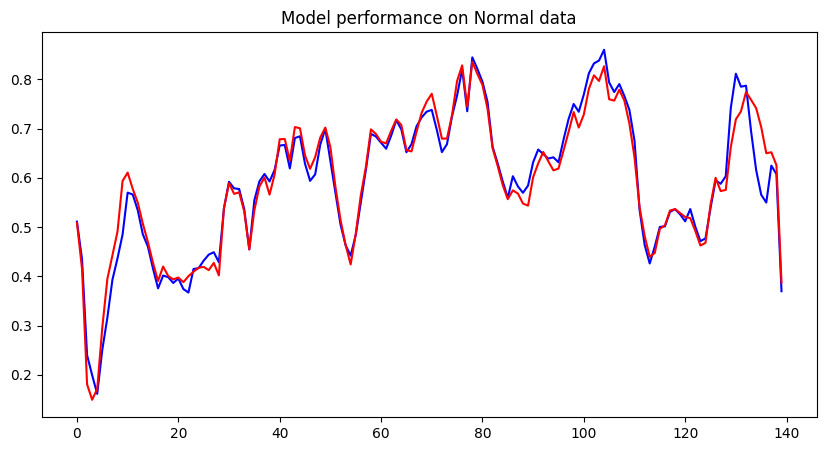

In [14]:
# First, we will plot the performance on Normal data which is first-class data.

plt.plot(normal_test_data[0], 'b')
plt.plot(decoder_out[0], 'r')
plt.title("Model performance on Normal data")
plt.show()

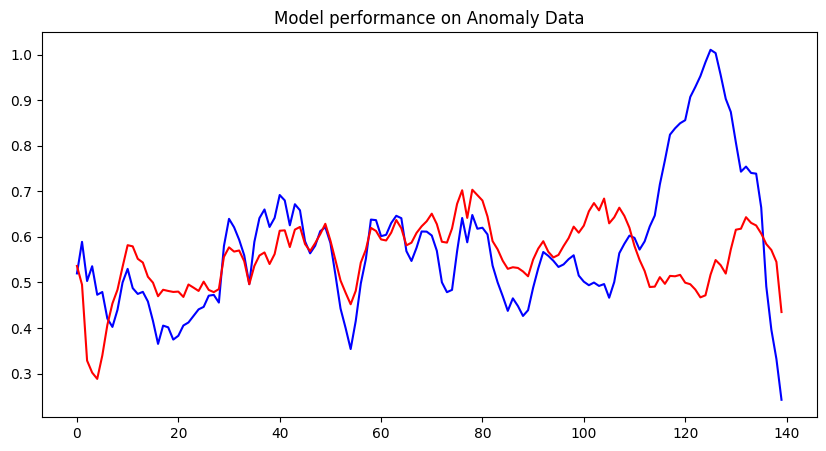

In [15]:
# As discussed there will be a very little reconstruction error on Normal data which we can see in the above graph. The difference between both the red and blue lines is very less. what if I pass the anomaly test data.

encoder_out_a = model.encoder(anomaly_test_data).numpy() #8 unit representation of data
decoder_out_a = model.decoder(encoder_out_a).numpy()
plt.plot(anomaly_test_data[0], 'b')
plt.plot(decoder_out_a[0], 'r')
plt.title("Model performance on Anomaly Data")
plt.show()
# The top is anomaly test data and the red one is decoder output. if you see that the reconstruction error over here is pretty high. Now we got a very good model.

18/18 [==============================] - 0s 3ms/step


(array([ 4.,  7., 16., 28., 42., 36., 55., 39., 42., 40., 34., 30., 18.,
        23., 24., 16., 17.,  9.,  8., 10.,  7.,  6.,  7.,  4.,  6.,  8.,
         3.,  2.,  3.,  0.,  4.,  1.,  0.,  3.,  2.,  0.,  0.,  1.,  1.,
         1.,  0.,  0.,  0.,  2.,  0.,  1.,  1.,  0.,  0.,  2.]),
 array([0.01190331, 0.0135118 , 0.0151203 , 0.01672879, 0.01833729,
        0.01994579, 0.02155428, 0.02316278, 0.02477128, 0.02637977,
        0.02798827, 0.02959677, 0.03120526, 0.03281376, 0.03442226,
        0.03603075, 0.03763925, 0.03924774, 0.04085624, 0.04246474,
        0.04407323, 0.04568173, 0.04729023, 0.04889872, 0.05050722,
        0.05211572, 0.05372421, 0.05533271, 0.05694121, 0.0585497 ,
        0.0601582 , 0.0617667 , 0.06337519, 0.06498369, 0.06659218,
        0.06820068, 0.06980918, 0.07141767, 0.07302617, 0.07463467,
        0.07624316, 0.07785166, 0.07946016, 0.08106865, 0.08267715,
        0.08428565, 0.08589414, 0.08750264, 0.08911114, 0.09071963,
        0.09232813]),
 <BarContainer

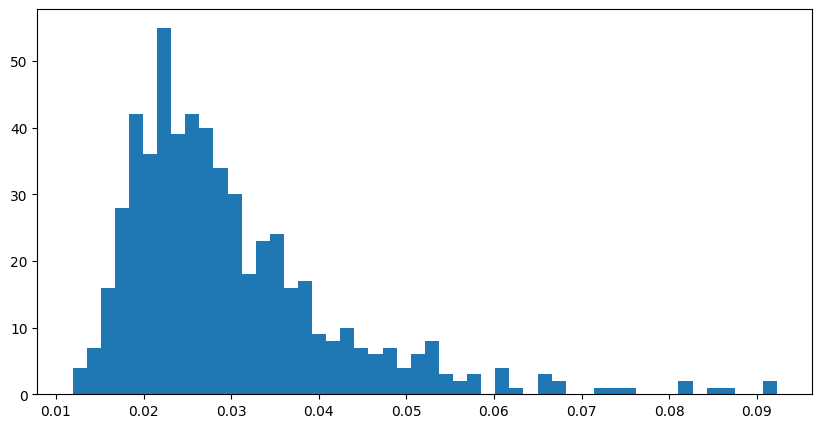

In [16]:
# Calculate Loss

# Now we will define our loss like threshold loss for our Model which gives us an output error between input and output. we define the Keras loss function over mean absolute error and plot it in form of a histogram.

reconstruction = model.predict(normal_test_data)
train_loss = tf.keras.losses.mae(reconstruction, normal_test_data)
plt.hist(train_loss, bins=50)




14/14 [==============================] - 0s 2ms/step


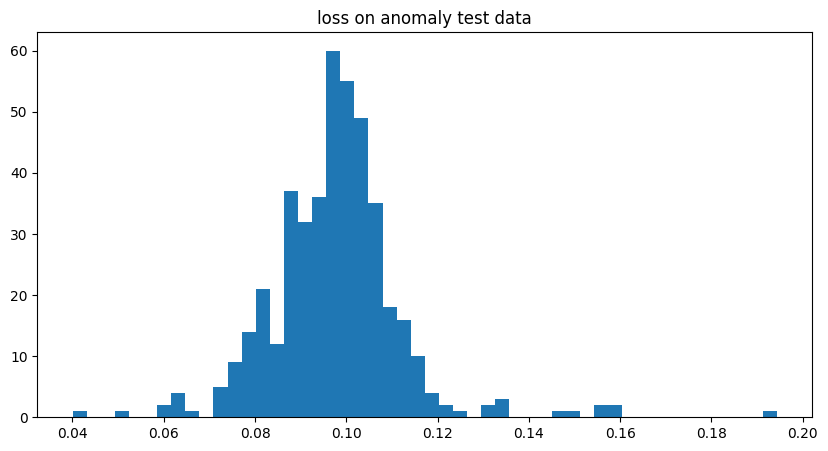

In [18]:
# If you see the X-axis then most of the values lie below 0.5. there are a few anomalies because we cannot have a 100% perfect model. This is how the error looks like between normal data and reconstructed data. Now we want to set a threshold from which we can tell that value above it is anomalies and below it is normal data so we take the mean of training loss and multiply it with second standard deviation. The threshold should be set as per business standards.

threshold = np.mean(train_loss) + 2*np.std(train_loss)
reconstruction_a = model.predict(anomaly_test_data)
train_loss_a = tf.keras.losses.mae(reconstruction_a, anomaly_test_data)
plt.hist(train_loss_a, bins=50)
plt.title("loss on anomaly test data")
plt.show()

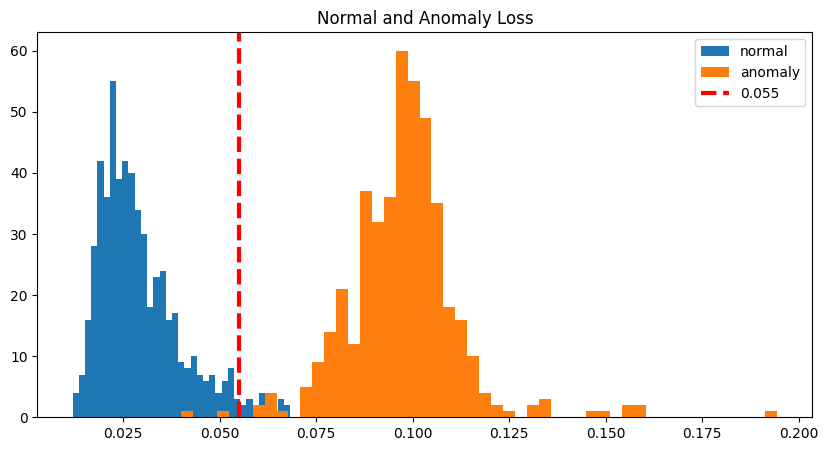

In [20]:
# If you saw the above graph then most of the data were below 0.5 and if we plot histogram on anomaly test data loss then most of the data lies above 0.5. Observe the separation between normal data loss and anomaly data loss; hence, we got a very good model.

# Plot Normal and anomaly Loss together

# To get a better idea of how both losses together look like let us plot both the loss along with the threshold. So we pass the normal training loss and anomaly loss in a separate histogram on a single graph. we are drawing a vertical line on the graph which is the threshold for better visualization.

plt.hist(train_loss, bins=50, label='normal')
plt.hist(train_loss_a, bins=50, label='anomaly')
plt.axvline(threshold, color='r', linewidth=3, linestyle='dashed', label='{:0.3f}'.format(threshold))
plt.legend(loc='upper right')
plt.title("Normal and Anomaly Loss")
plt.show()

# Now if you see a mean anomaly loss then earlier it was 33 percent but not it is 90 percent which is way far but the standard deviation will be close. Now we have a very good understanding of model performance so let us see how many false positives and false negatives are there so that we can define the average model performance.

In [21]:
# How well does it predict Normal Class?

# Anomaly data is data above to threshold so we use TensorFlow max function to find the values that are in anomaly data.

preds = tf.math.less(train_loss, threshold)
tf.math.count_nonzero(preds)
# Among 563 total records, it predicts 536 values correctly so we can say that Model is 95 per cent accurate in predicting normal class.

<tf.Tensor: shape=(), dtype=int64, numpy=538>

In [22]:
# How well does it perform on Anomaly data?

# Now we use a greater function to find the count of values that are greater than a threshold which is anomalies.

preds_a = tf.math.greater(train_loss_a, threshold)
tf.math.count_nonzero(preds_a)
# From 437 total records 431, it has predicted accurately means the final Model is 90 to 95 per cent accurate in predicting the new points.

<tf.Tensor: shape=(), dtype=int64, numpy=435>